# Face Mask Detection using VGG Model
[Dataset](https://github.com/chandrikadeb7/Face-Mask-Detection)

## Contents
* Data Understanding
* Modeling
* Evaluation
* Prediction

In [19]:
import os
import cv2
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
generator = ImageDataGenerator(validation_split=0.2, rescale=1./255)

Train data generator

In [23]:
train_generator = generator.flow_from_directory(
    'dataset',
    subset='training',
    class_mode='binary',
    color_mode='rgb',
    batch_size=30,
    target_size=(224, 224),
    shuffle=True)

Found 1600 images belonging to 2 classes.


Test data generator

In [24]:
test_generator = generator.flow_from_directory(
    'dataset',
    subset='validation',
    class_mode='binary',
    color_mode='rgb',
    batch_size=30,
    target_size=(224, 224),
    shuffle=True)

Found 400 images belonging to 2 classes.


### Modeling
* VGG19

In [13]:
vgg = VGG19()

In [14]:
model = Sequential()

In [15]:
for layer in vgg.layers[:-1]:
    layer.trainable = False
    model.add(layer)

In [16]:
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

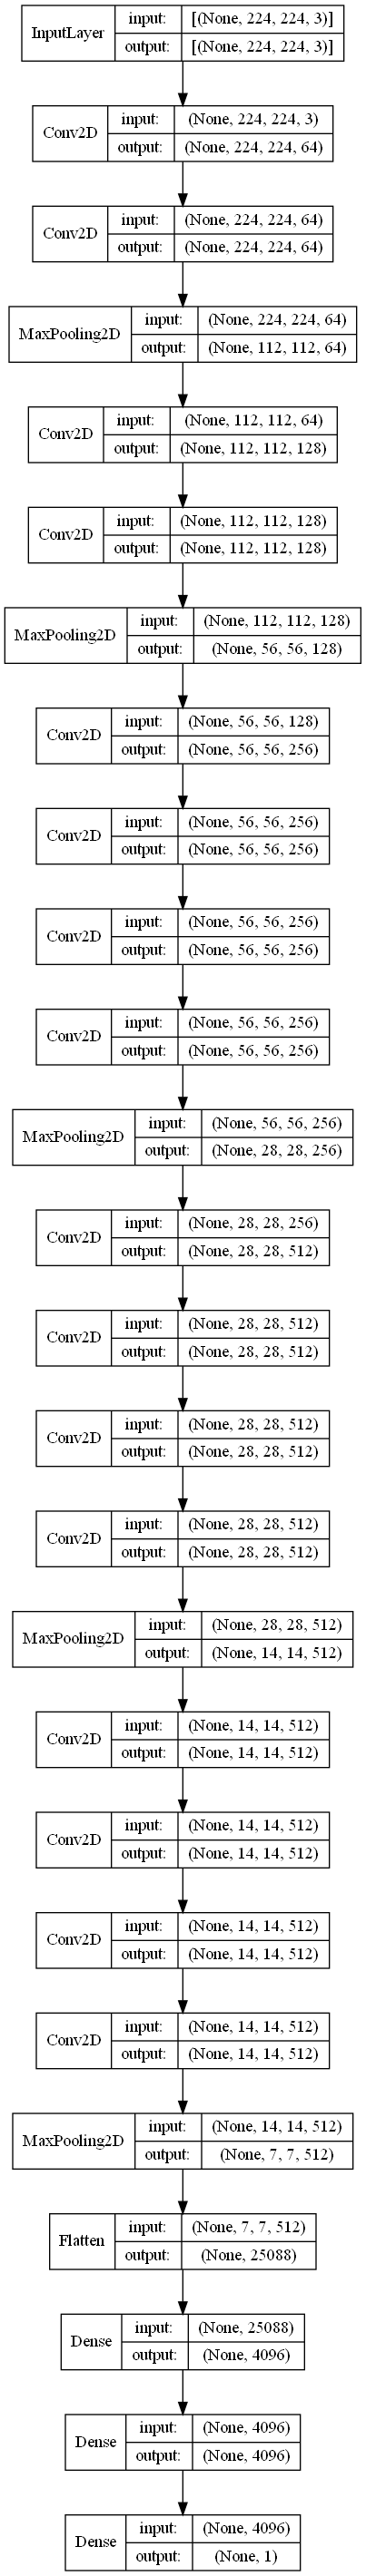

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=False)

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
checkpoint = ModelCheckpoint('model_weights_epoch{epoch:02d}.h5', save_weights_only=True)

In [25]:
history = model.fit(train_generator, validation_data=test_generator, epochs=5, callbacks=[checkpoint])

Epoch 1/5
13/54 [======>.......................] - ETA: 10:32 - loss: 0.7741 - accuracy: 0.5462

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


54/54 [==============================] - 1072s 20s/step - loss: 0.6033 - accuracy: 0.6844 - val_loss: 0.5254 - val_accuracy: 0.7400
Epoch 2/5
54/54 [==============================] - 1084s 20s/step - loss: 0.4145 - accuracy: 0.8331 - val_loss: 0.4751 - val_accuracy: 0.7800
Epoch 3/5
54/54 [==============================] - 1089s 20s/step - loss: 0.3527 - accuracy: 0.8687 - val_loss: 0.3764 - val_accuracy: 0.8675
Epoch 4/5
54/54 [==============================] - 1092s 20s/step - loss: 0.3082 - accuracy: 0.8919 - val_loss: 0.3608 - val_accuracy: 0.8550
Epoch 5/5
54/54 [==============================] - 1082s 20s/step - loss: 0.2819 - accuracy: 0.9013 - val_loss: 0.3066 - val_accuracy: 0.8925


### Evaluation

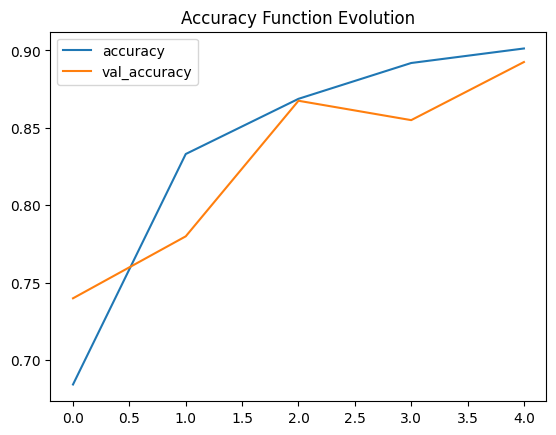

In [26]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()
plt.show()

Saving the model

In [27]:
model.save('vgg19_face_mask_detection.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
